In [2]:
import pandas as pd
import numpy as np
import re
import string
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\LAKSHAY
[nltk_data]     JAIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [5]:
df_train       = pd.read_csv("../data/train.csv")
df_test        = pd.read_csv("../data/test.csv")
df_test_labels = pd.read_csv("../data/test_labels.csv")

In [6]:
df_test_full = df_test.merge(df_test_labels, on="id")

In [7]:
df_test_full.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [8]:
df_test_clean = df_test_full[
    df_test_full[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].ne(-1).any(axis=1)
]

In [9]:
df_train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [10]:
df_train.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

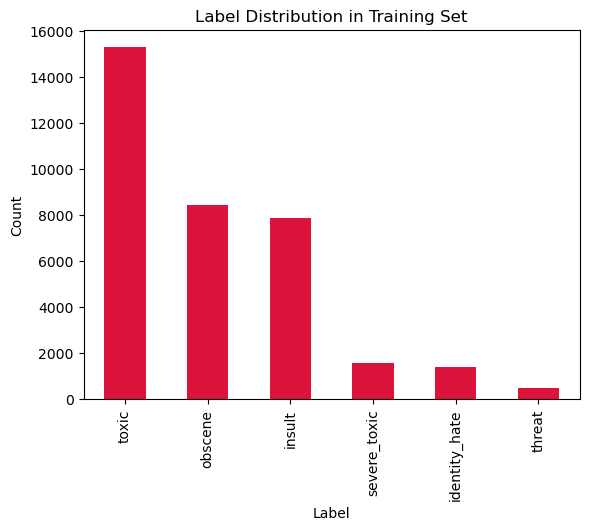

In [11]:
## Toxicity Data visualization
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
df_train[label_cols].sum().sort_values(ascending=False).plot(kind="bar", color="crimson")

plt.title("Label Distribution in Training Set")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

In [12]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>', '', text)               
    text = re.sub(r'\d+', '', text) 
    text = text.translate(str.maketrans('', '', string.punctuation))  
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

In [13]:
df_train['clean_text'] = df_train['comment_text'].apply(clean_text)
df_train[['comment_text', 'clean_text']].head()

,comment_text,clean_text
0,Explanation\nWhy the edits made under my usern...,explanation edits made username hardcore metal...
1,D'aww! He matches this background colour I'm s...,daww matches background colour im seemingly st...
2,"Hey man, I'm really not trying to edit war. It...",hey man im really trying edit war guy constant...
3,"""\nMore\nI can't make any real suggestions on ...",cant make real suggestions improvement wondere...
4,"You, sir, are my hero. Any chance you remember...",sir hero chance remember page thats


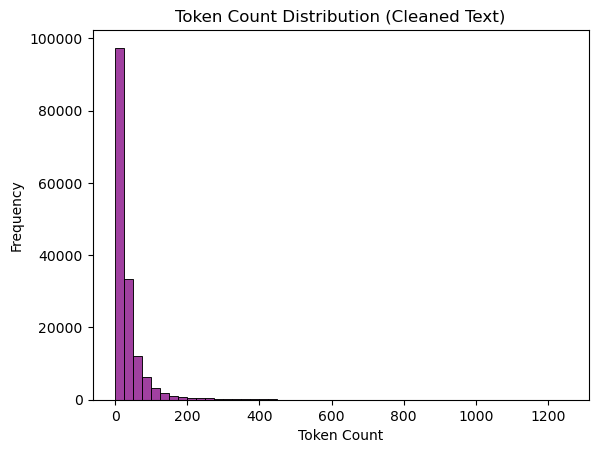

In [14]:
df_train['text_len'] = df_train['clean_text'].apply(lambda x: len(x.split()))
sns.histplot(df_train['text_len'], bins=50, color='purple')

plt.title("Token Count Distribution (Cleaned Text)")
plt.xlabel("Token Count")
plt.ylabel("Frequency")
plt.show()

In [15]:
df_train.to_csv("../data/train_clean.csv", index=False)

In [17]:
df_train[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum()

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64